# Single Perceptron Neural Networks for Linear Regression

Welcome to your week 3 programming assignment. Now you are ready to apply matrix multiplication by building your first neural network with a single perceptron.

**After this assignment you will be able to:**
- Implement a neural network with a single perceptron and one input node for simple linear regression
- Implement forward propagation using matrix multiplication
- Implement a neural network with a single perceptron and two input nodes for multiple linear regression

*Note*: Backward propagation with the parameters update requires understanding of Calculus. It is discussed in details in the Course "Calculus" (Course 2 in the Specialization "Mathematics for Machine Learning"). In this assignment backward propagation and parameters update functions are hidden.

# Table of Contents

- [ 1 - Simple Linear Regression](#1)
  - [ 1.1 - Simple Linear Regression Model](#1.1)
  - [ 1.2 - Neural Network Model with a Single Perceptron and One Input Node](#1.2)
  - [ 1.3 - Dataset](#1.3)
    - [ Exercise 1](#ex01)
- [ 2 - Implementation of the Neural Network Model for Linear Regression](#2)
  - [ 2.1 - Defining the Neural Network Structure](#2.1)
    - [ Exercise 2](#ex02)
  - [ 2.2 - Initialize the Model's Parameters](#2.2)
    - [ Exercise 3](#ex03)
  - [ 2.3 - The Loop](#2.3)
    - [ Exercise 4](#ex04)
  - [ 2.4 - Integrate parts 2.1, 2.2 and 2.3 in nn_model()](#2.4)
    - [ Exercise 5](#ex05)
- [ 3 - Multiple Linear Regression](#3)
  - [ 3.1 - Multipe Linear Regression Model](#3.1)
  - [ 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes](#3.2)
  - [ 3.3 - Dataset](#3.3)
  - [ 3.4 - Performance of the Neural Network Model for Multiple Linear Regression](#3.4)
    - [ Exercise 6](#ex06)

## Packages

Let's first import all the packages that you will need during this assignment.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
# A function to create a dataset.
from sklearn.datasets import make_regression
# A library for data manipulation and analysis.
import pandas as pd
# Some functions defined specifically for this notebook.
import w3_tools

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

Load the unit tests defined for this notebook.

In [83]:
import w3_unittest

<a name='1'></a>
## 1 - Simple Linear Regression

**Linear regression** is a linear approach for modelling the relationship between a scalar response (**dependent variable**) and one or more explanatory variables (**independent variables**). The case of one independent variable is called **simple linear regression**; for more than one, it is called **multiple linear regression**. 

<a name='1.1'></a>
### 1.1 - Simple Linear Regression Model

Simple linear regression model can be written as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, the aim is to find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

You can use a simple neural network model to do that. Vector algebra will be used in the core of the model!

<a name='1.2'></a>
### 1.2 - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model has only one **perceptron**. It takes some inputs and calculates the output value.

The perceptron components are shown in the following scheme:

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

The smallest construction block of neural networks is called a **node**. Some nodes store numbers from the input and others store the calculated values. **Input nodes** (here there is only one input node $x$) contain the input to the network which consists of your data. These nodes are set as an **input layer** of the network.

**Weight** ($w$) and **bias** ($b$) are the parameters which will get updated when you will **train** the model. They are initialized to some random value or set to 0 and updated as the training progresses. The bias is analogous to a weight independent of any input node. It makes the model more flexible.

The perceptron output calculation is straightforward: first compute the product of $x$ and weight $w$ and the add the bias:

$$z = w x + b\tag{2}$$

The **output layer** of the single perceptron has only one node $\hat{y} = z$.

Putting it all together, mathematically the single perceptron neural network model can be expressed as:

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{3}\end{align}

where $x^{(i)}$ represents the $i$-th training example and $\hat{y}^{(i)}$ will be the prediction based on that example, $i = 1, \dots, m$.

If you have $m$ training examples, vector operations will give you a chance to perform the calculations simultaniously for all of them! Organise all training examples as a vector $X$ of size ($1 \times m$). Then perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to the vector of size ($1 \times m$):

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{4}\end{align}

This significantly speeds up the calculations for the larger training sets! This set of calculations is called **forward propagation**.

Now, you can compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the original vector of data $Y$. This can be done with the so called **cost function** that measures how close your vector of predictions to the training data. It evaluates how well the parameters $w$ and $b$ work to solve the problem. There are many different cost functions available depending on the nature of your problem. For your simple neural network you can calculate it as:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{5}$$

The aim is to minimize the cost function during the training, which will minimize the differences between original values $y_i$ and predicted values $\hat{y}_i$ (division by $2m$ is taken just for scaling purposes).

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results.

The next step is to adjust the weights and bias, in order to minimize the cost function. This process is called **backward propagation** and is done iteratively: you update the parameters with a small change and repeat the process.

*Note*: Backward propagation is not covered in this Course - it will be discussed in the next Course of this Specialization.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

You often build helper functions to compute steps 1-3 and then merge them into one function you call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

<a name='1.3'></a>
### 1.3 - Dataset

First, let's get the dataset you will work on. The following code will create $m=30$ data points $(x_1, y_1)$, ..., $(x_m, y_m)$ and save them in `NumPy` arrays `X` and `Y` of a shape $(1 \times m)$.

In [87]:
m = 30

X, Y = make_regression(n_samples=m, n_features=1, noise=10, random_state=1)

X = X.reshape((1, m))
Y = Y.reshape((1, m))

print('Training dataset X:')
print(X)
print('Training dataset Y')
print(Y)

Training dataset X:
[[ 0.3190391  -1.07296862  0.86540763 -0.17242821  1.14472371  0.50249434
  -2.3015387  -0.68372786 -0.38405435 -0.87785842 -2.06014071 -1.10061918
  -1.09989127  1.13376944  1.74481176 -0.12289023 -0.93576943  1.62434536
   1.46210794  0.90159072 -0.7612069   0.53035547 -0.52817175 -0.26788808
   0.58281521  0.04221375  0.90085595 -0.24937038 -0.61175641 -0.3224172 ]]
Training dataset Y
[[  3.08130585 -48.2639338   25.93592732   1.87178372  45.4428258
    6.88380644 -72.44927625 -16.20740827 -12.15967691 -25.0337406
  -66.76530644 -35.83422144 -27.17695128  53.04737598  52.96856006
   10.13384942 -20.19197583  36.16208808  58.99412194  38.42855536
  -32.81240623   6.77988325 -15.82439642 -20.62478531  18.61129032
    9.78715027  31.80735422  -4.11214063 -11.04200012 -15.08634424]]


Plot the dataset:

Text(0, 0.5, '$y$')

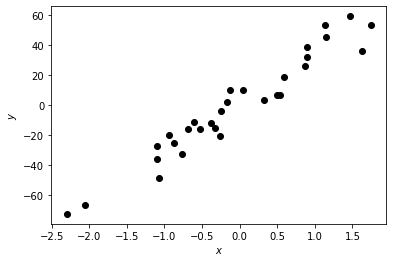

In [88]:
plt.scatter(X,  Y, c="black")

plt.xlabel("$x$")
plt.ylabel("$y$")

<a name='ex01'></a>
### Exercise 1

What is the `shape` of the variables `X` and `Y`? In addition, how many training examples do you have?

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>How do you get the shape of a NumPy array?</li>
    <li>The coordinates x1, x2 were saved in the columns of the array X</li>
</ul>
</p>

In [89]:
### START CODE HERE ### (~ 3 lines of code)
# Shape of variable X.
shape_X = (1,30)
# Shape of variable Y.
shape_Y = (1,30)
# Training set size.
m = 30
### END CODE HERE ###

print ('The shape of X: ' + str(shape_X))
print ('The shape of Y: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X: (1, 30)
The shape of Y: (1, 30)
I have m = 30 training examples!


##### __Expected Output__

```Python
The shape of X: (1, 30)
The shape of Y: (1, 30)
I have m = 30 training examples!
```

In [90]:
w3_unittest.test_shapes(shape_X, shape_Y, m)

 All tests passed


<a name='2'></a>
## 2 - Implementation of the Neural Network Model for Linear Regression

Let's setup the neural network in a way which will allow to extend this simple case of a model to more complicated structures later.

<a name='2.1'></a>
### 2.1 - Defining the Neural Network Structure

<a name='ex02'></a>
### Exercise 2

Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    Use shapes of X and Y to find n_x and n_y:
    <li>the size of the input layer n_x equals to the size of the input vectors placed in the columns of the array X,</li>
    <li>the outpus for each of the data point will be saved in the columns of the the array Y.</li>
</ul>
</p>

In [91]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (~ 2 lines of code)
    # Size of input layer.
    n_x = X.shape[0]
    # Size of output layer.
    n_y = Y.shape[0]
    ### END CODE HERE ###
    return (n_x, n_y)

In [92]:
(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


##### __Expected Output__

```Python
The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1
```

In [93]:
w3_unittest.test_layer_sizes(layer_sizes)

 All tests passed


<a name='2.2'></a>
### 2.2 - Initialize the Model's Parameters

<a name='ex03'></a>
### Exercise 3

Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrix with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vector as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [94]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    ### START CODE HERE ### (~ 2 lines of code)
    W = np.random.randn(n_y,n_x)
    b = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W.shape == (n_y, n_x))
    assert (b.shape == (n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

In [95]:
parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[1.78862847]]
b = [[0.]]


##### __Expected Output__ 
Note: the elements of the array W maybe be different due to random initialization. You can try to restart the kernel to get the same values.

```Python
W = [[0.01788628]]
b = [[0.]]
```

In [96]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_initialize_parameters(initialize_parameters)

 All tests passed


<a name='2.3'></a>
### 2.3 - The Loop

<a name='ex04'></a>
### Exercise 4

Implement `forward_propagation()`.

**Instructions**:
- Look at the mathematical representation of your model $(4)$ in the section [1.2](#1.2):
\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute `Z` multiplying arrays `w`, `X` and adding vector `b`. Set the prediction array $A$ equal to $Z$.  


In [97]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output
    """
    # Retrieve each parameter from the dictionary "parameters".
    ### START CODE HERE ### (~ 2 lines of code)
    W = parameters['W']
    b = parameters['b']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate Z.
    ### START CODE HERE ### (~ 2 lines of code)
    Z = np.dot(W,X)+ b
    Y_hat = Z
    ### END CODE HERE ###
    print(Y_hat.shape,(n_y,X.shape[1]))
    assert(Y_hat.shape == (n_y, X.shape[1]))

    return Y_hat

In [98]:
Y_hat = forward_propagation(X, parameters)

print(Y_hat)

(1, 30) (1, 30)
[[ 0.57064241 -1.91914223  1.54789273 -0.30841     2.04748542  0.89877568
  -4.11659765 -1.22293512 -0.68693055 -1.57016256 -3.68482633 -1.9685988
  -1.96729684  2.02789231  3.12082    -0.21980496 -1.67374385  2.90535037
   2.61516789  1.61261083 -1.36151634  0.94860889 -0.94470303 -0.47915225
   1.04243989  0.07550471  1.6112966  -0.44603095 -1.09420494 -0.57668459]]


##### __Expected Output__ 
Note: the elements of the array Y_hat maybe be different depending on the initial parameters. If you would like to get exactly the same output, try to restart the Kernel and rerun the notebook.

```Python
[[ 0.00570642 -0.01919142  0.01547893 -0.0030841   0.02047485  0.00898776
  -0.04116598 -0.01222935 -0.00686931 -0.01570163 -0.03684826 -0.01968599
  -0.01967297  0.02027892  0.0312082  -0.00219805 -0.01673744  0.0290535
   0.02615168  0.01612611 -0.01361516  0.00948609 -0.00944703 -0.00479152
   0.0104244   0.00075505  0.01611297 -0.00446031 -0.01094205 -0.00576685]]
```

In [99]:
w3_unittest.test_forward_propagation(forward_propagation)

(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 5) (1, 5)
 All tests passed


Remember that your weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function $(5)$ which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [100]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

In [101]:
print("cost = " + str(compute_cost(Y_hat, Y)))

cost = 507.9383358215691


You want to minimize the cost value, bringing it as close as possible to $0$, making your vector of predictions as similar to the training data as possible.

To achieve this, backward propagation needs to be performed. It is covered in details in the Course "Calculus" (Course 2 in the Specialization "Mathematics for Machine Learning"). For now you can use a function `train_nn()` from the uploaded toolbox to get the updated parameters in each step of the loop.

In [102]:
parameters = w3_tools.train_nn(parameters, Y_hat, X, Y)

print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[39.05884267]]
b = [[-0.8172973]]


<a name='2.4'></a>
### 2.4 - Integrate parts 2.1, 2.2 and 2.3 in nn_model()

<a name='ex05'></a>
### Exercise 5

Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

In [103]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, num_iterations=10, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    # Initialize parameters
    ### START CODE HERE ### (~ 1 line of code)
    parameters = initialize_parameters(n_x,n_y)
    ### END CODE HERE ###
    
    # Loop
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (~ 2 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = np.sum((Y_hat - Y)**2)/(2*m)
        ### END CODE HERE ###
        
        
        # Parameters update.
        parameters = w3_tools.train_nn(parameters, Y_hat, X, Y) 
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [104]:
parameters = nn_model(X, Y, num_iterations=15, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

(1, 30) (1, 30)
Cost after iteration 0: 617.205042
(1, 30) (1, 30)
Cost after iteration 1: 67.971664
(1, 30) (1, 30)
Cost after iteration 2: 37.690211
(1, 30) (1, 30)
Cost after iteration 3: 35.497525
(1, 30) (1, 30)
Cost after iteration 4: 35.323507
(1, 30) (1, 30)
Cost after iteration 5: 35.309358
(1, 30) (1, 30)
Cost after iteration 6: 35.308201
(1, 30) (1, 30)
Cost after iteration 7: 35.308106
(1, 30) (1, 30)
Cost after iteration 8: 35.308098
(1, 30) (1, 30)
Cost after iteration 9: 35.308098
(1, 30) (1, 30)
Cost after iteration 10: 35.308098
(1, 30) (1, 30)
Cost after iteration 11: 35.308098
(1, 30) (1, 30)
Cost after iteration 12: 35.308098
(1, 30) (1, 30)
Cost after iteration 13: 35.308098
(1, 30) (1, 30)
Cost after iteration 14: 35.308098
W = [[32.24855804]]
b = [[1.14465379]]


##### __Expected Output__ 
Note: the actual values can be different!

```Python
Cost after iteration 0: 791.431703
Cost after iteration 1: 176.530000
Cost after iteration 2: 143.772255
Cost after iteration 3: 141.433606
Cost after iteration 4: 141.248744
Cost after iteration 5: 141.233728
Cost after iteration 6: 141.232500
Cost after iteration 7: 141.232400
Cost after iteration 8: 141.232391
Cost after iteration 9: 141.232391
Cost after iteration 10: 141.232391
Cost after iteration 11: 141.232391
Cost after iteration 12: 141.232391
Cost after iteration 13: 141.232391
Cost after iteration 14: 141.232391
W = [[35.71958208]]
b = [[2.2893077]]
```

In [105]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_nn_model(nn_model)

(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 30) (1, 30)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)
(1, 5) (1, 5)


You can see that after a few iterations the cost function does not change anymore (the model converges).

*Note*: This is a very simple model. In reality the models do not converge that quickly.

The final model parameters can be used for making predictions. Let's plot the linear regression line and some predictions. The regression line is red and the predicted points are blue.

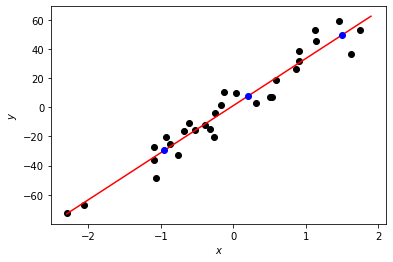

In [106]:
X_pred = np.array([-0.95, 0.2, 1.5])

fig, ax = plt.subplots()
plt.scatter(X, Y, color = "black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
ax.plot(X_line, W_simple[0,0] * X_line + b_simple[0,0], "r")
ax.plot(X_pred, W_simple[0,0] * X_pred + b_simple[0,0], "bo")
plt.plot()
plt.show()

Not bad for such a small neural network with just a single perceptron and one input node!

<a name='3'></a>
## 3 - Multiple Linear Regression

Models are not always as simple as the one above. In some cases your output is dependent on more than just one variable. Let's look at the case where the output depends on two input variables.

<a name='3.1'></a>
### 3.1 - Multipe Linear Regression Model

Multiple linear regression model with two independent variables $x_1$, $x_2$ can be written as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{6}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept. 

The goal is the same - find the "best" parameters $w_1$, $w_2$ and $b$ such the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum.

You can use a slightly more complicated neural network model to do that. Now matrix multiplication will be in the core of the model!

<a name='3.2'></a>
### 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes

Again, you will use only one perceptron, but with two input nodes shown in the following scheme:

<img src="images/nn_model_linear_regression_multiple.png" style="width:420px;">

The perceptron output calculation for every training example $x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$ can be written with dot product:

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b,\tag{7}$$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y}^{(i)} = z^{(i)}$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1^{(i)}$ and $x_2^{(i)}$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX = 
\begin{bmatrix} w_1 & w_2\end{bmatrix} 
\begin{bmatrix} 
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\ 
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix} 
w_1x_1^{(1)} + w_2x_2^{(1)} & 
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots & 
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

And the model can be written as

\begin{align}
Z &=  W X + b,\\
\hat{Y} &= Z,
\tag{8}\end{align}

where $b$ is broadcasted to the vector of a size ($1 \times m$). These are the calculations to perform in the forward propagation step. Cost function will remain the same, and there will be no change in methodology and training (that will be discussed in the next Course)!

<a name='3.3'></a>
### 3.3 - Dataset

Let's build a linear regression model for a Kaggle dataset [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), saved in a file `data/house_prices_train.csv`. You will use two fields - ground living area (`GrLivArea`, square feet) and rates of the overall quality of material and finish (`OverallQual`, 1-10) to predict sales price (`SalePrice`, dollars).

To open the dataset you can use `pandas` function `read_csv`:

In [107]:
df = pd.read_csv('data/house_prices_train.csv')

The data is now saved in the variable `df` as a **DataFrame**, which is the most commonly used `pandas` object. It is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a table or a spreadsheet. Full documentation can be found [here](https://pandas.pydata.org/).

Select the required fields and save them in the variables `X_multi`, `Y_multi`:

In [108]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']

Have a look at the data:

In [109]:
print(f"X_multi:\n{X_multi}\n")
print(f"Y_multi:\n{Y_multi}\n")

X_multi:
      GrLivArea  OverallQual
0          1710            7
1          1262            6
2          1786            7
3          1717            7
4          2198            8
...         ...          ...
1455       1647            6
1456       2073            6
1457       2340            7
1458       1078            5
1459       1256            5

[1460 rows x 2 columns]

Y_multi:
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64



All of the original arrays have different units. To make training of the neural network efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the third Course of Specialization.

Normalization is implemented in the following code:

In [110]:
X_multi_norm = (X_multi - np.mean(X_multi))/np.std(X_multi)
Y_multi_norm = (Y_multi - np.mean(Y_multi))/np.std(Y_multi)

Convert results to the `NumPy` arrays, transpose `X_multi_norm` to get an array of a shape ($2 \times m$) and reshape `Y_multi_norm` to bring it to the shape ($1 \times m$):

In [111]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


### 3.4 - Performance of the Neural Network Model for Multiple Linear Regression

The magic is that now you do not need to change anything in your neural network implementation! Go through the code in section [2](#2) and see that if you pass new datasets `X_multi_norm` and `Y_multi_norm`, the input layer size $n_x$ will get equal to $2$ and the rest of the implementation will remain exactly the same. That's the power of the neural networks (and matrix multiplication)!

<a name='ex06'></a>
### Exercise 6

Run the constructed above neural network model `nn_model()` for `100` iterations, passing the training dataset saved in the arrays `X_multi_norm` and `Y_multi_norm`.

In [116]:
### START CODE HERE ### (~ 1 line of code)
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)
### END CODE HERE ###

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

(1, 1460) (1, 1460)
Cost after iteration 0: 75.453980
(1, 1460) (1, 1460)
Cost after iteration 1: 57.847342
(1, 1460) (1, 1460)
Cost after iteration 2: 47.669171
(1, 1460) (1, 1460)
Cost after iteration 3: 40.376470
(1, 1460) (1, 1460)
Cost after iteration 4: 34.621118
(1, 1460) (1, 1460)
Cost after iteration 5: 29.918103
(1, 1460) (1, 1460)
Cost after iteration 6: 26.030655
(1, 1460) (1, 1460)
Cost after iteration 7: 22.805537
(1, 1460) (1, 1460)
Cost after iteration 8: 20.126797
(1, 1460) (1, 1460)
Cost after iteration 9: 17.901056
(1, 1460) (1, 1460)
Cost after iteration 10: 16.051495
(1, 1460) (1, 1460)
Cost after iteration 11: 14.514479
(1, 1460) (1, 1460)
Cost after iteration 12: 13.237177
(1, 1460) (1, 1460)
Cost after iteration 13: 12.175702
(1, 1460) (1, 1460)
Cost after iteration 14: 11.293584
(1, 1460) (1, 1460)
Cost after iteration 15: 10.560517
(1, 1460) (1, 1460)
Cost after iteration 16: 9.951316
(1, 1460) (1, 1460)
Cost after iteration 17: 9.445051
(1, 1460) (1, 1460)
Co

##### __Expected Output__ 
Note: the actual values can be different!

```Python
Cost after iteration 0: 0.489797
Cost after iteration 1: 0.429192
Cost after iteration 2: 0.380299
Cost after iteration 3: 0.340051
Cost after iteration 4: 0.306705
Cost after iteration 5: 0.279020
...
Cost after iteration 95: 0.142913
Cost after iteration 96: 0.142913
Cost after iteration 97: 0.142913
Cost after iteration 98: 0.142913
Cost after iteration 99: 0.142913
W = [[0.36946186 0.5718172 ]]
b = [[1.35781797e-16]]
```

In [117]:
# Note: 
# Actual values are not checked here in the unit tests (due to random initialization).
w3_unittest.test_multi(nn_model, X_multi_norm, Y_multi_norm, parameters_multi)

(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)
(1, 1460) (1, 1460)


Remember, that the initial datasets were normalized. To make the predictions, you need to normalize the original, calculate predictions with the obtained linear regression coefficients and then **denormalize** the result (perform the reverse process of normalization):

In [118]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T

# Normalize using the same mean and standard deviation of the original training array X_multi.
X_multi_mean = np.array(np.mean(X_multi)).reshape((2,1))
X_multi_std = np.array(np.std(X_multi)).reshape((2,1))
X_pred_multi_norm = (X_pred_multi - X_multi_mean)/ X_multi_std
# Make predictions.
Y_pred_multi_norm = np.matmul(W_multi, X_pred_multi_norm) + b_multi
# Denormalize using the same mean and standard deviation of the original training array Y_multi.
Y_pred_multi = Y_pred_multi_norm * np.std(Y_multi) + np.mean(Y_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

Ground living area, square feet:
[1710 1200 2200]
Rates of the overall quality of material and finish, 1-10:
[7 6 8]
Predictions of sales price, $:
[[221368. 160041. 281579.]]


Congrats on finishing this programming assignment!

In [119]:
# grade-up-to-here